In [60]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## SciPy and Normal Curves ##

### Plotting Normal Curves ###

The `prob140` function `Plot_norm` takes three arguments and displays the corresponding normal curve. The arguments are:

- the interval over which to draw the curve, as a list or array with the two endpoints
- the mean
- the SD

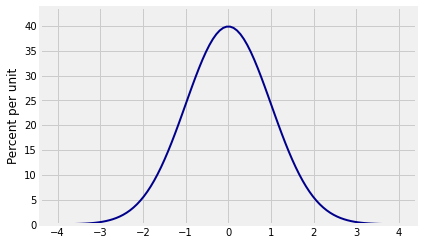

In [61]:
Plot_norm([-4, 4], 0, 1)

You can shade all the area to the left of a point $x$, by providing the point $x$ as the `right_end` of the interval $(-\infty, x]$.

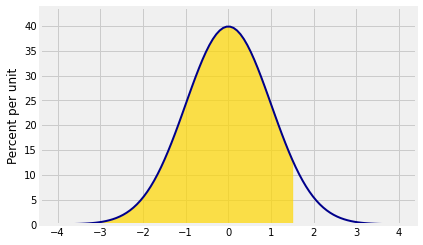

In [62]:
Plot_norm([-4, 4], 0, 1, right_end=1.5)

All the area to the right of a point:

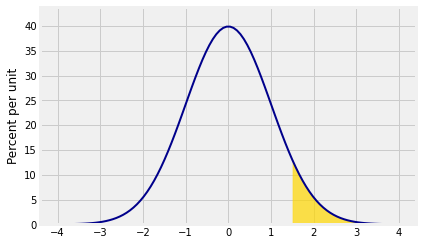

In [63]:
Plot_norm([-4, 4], 0, 1, left_end=1.5)

The area between two points:

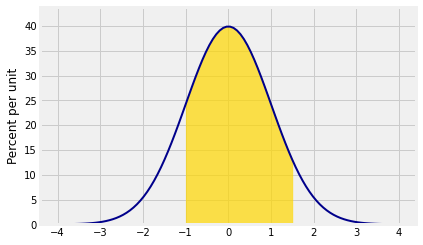

In [64]:
Plot_norm([-4, 4], 0, 1, right_end=-1, left_end=1.5)

### Phi and Its Inverse ###

All the areas displayed above can be expressed in terms of the standard normal cdf $\Phi$.

Recall that the standard normal cdf $\Phi$ is the function defined by

$$
\Phi(x) = \int_{-\infty}^x \phi(z)dz ~, ~~~~ -\infty < x < \infty
$$

where $\phi$ is the standard normal curve. 

For each $x$, the value of $\Phi(x)$ is an area under the standard normal curve. The function $\Phi$ takes a real number $x$ as its argument and returns a proportion $p$ which is all the area to the left of $x$ under the standard normal curve.

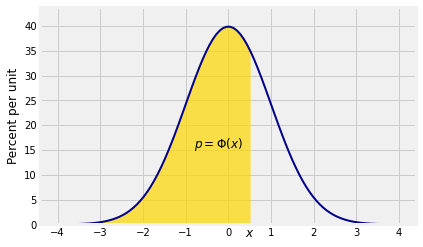

In [65]:
Plot_norm([-4, 4], 0, 1, right_end=0.5)
plt.text(0.4, -0.025, '$x$', size=12)
plt.text(-0.8, 0.155, '$p = \Phi(x)$', size=12);

It will also be helpful to go the other way, and identify the $x$ such that $\Phi(x)$ is a specified value $p$. In other words, we will need $\Phi^{-1}$, the inverse of $\Phi$, which is determined by

$$
\Phi(z) ~ = ~ p ~~ \iff ~~ \Phi^{-1}(p) = z
$$

For each $p$ in the interval $(0, 1)$, the value of $\Phi^{-1}(p)$ is a point on the horizontal axis of the graph of the standard normal curve.

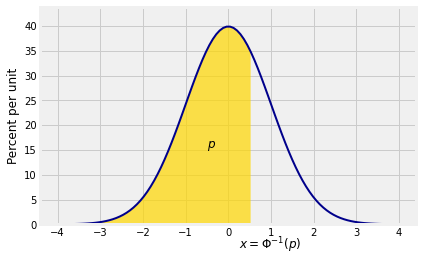

In [66]:
Plot_norm([-4, 4], 0, 1, right_end=0.5)
plt.text(0.25, -0.05, '$x = \Phi^{-1}(p)$', size=12)
plt.text(-0.5, 0.155, '$p$', size=12);

### Phi and Its Inverse in `SciPy` ###

As we noted in the previous section, there is no closed form formula for $\Phi$. So there also isn't one for $\Phi^{-1}$. But most computational systems provide excellent numerical approximations.

In `SciPy` the approximations are in the familiar `stats` module. For the standard normal cdf, use `stats.norm.cdf` just as you used `stats.binom.cdf` and so on. By default, `stats.norm.cdf` is based on the standard normal curve.

The area to the left of $1$ under the standard normal curve:

In [67]:
stats.norm.cdf(1)

0.8413447460685429

The area between $-1$ and $1$ under the standard normal curve can be found by using the cdf and subtraction in a familiar way:

In [68]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In both examples above, we started with a point or points on the horizontal axis and used the cdf $\Phi$ to find a related area. We can also go backwards, by specfiying an area and using $\Phi^{-1}$ to find a related point on the horizontal axis.

For example, if you want $x$ such that $\Phi(x) = 0.9$, you can use the *percent point function* `stats.norm.ppf`. The name comes from the expression "90% point" of the distribution, or equivalently, the 90th percentile.

In [69]:
stats.norm.ppf(0.9)

1.2815515655446004

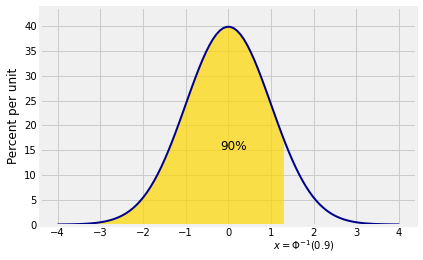

In [70]:
Plot_norm([-4, 4], 0, 1, right_end=stats.norm.ppf(0.9))
plt.text(1.05, -0.05, '$x = \Phi^{-1}(0.9)$')
plt.text(-0.2, 0.15, '90%', size=12);

By the definition of an inverse, we should have $\Phi(\Phi^{-1}(0.9)) = 0.9$. Let's check that.

In [71]:
stats.norm.cdf(stats.norm.ppf(0.9))

0.8999999999999999

### Example ###
Suppose the weights of a sample of 100 people are i.i.d. with a mean of 150 pounds and an SD of 20 pounds. Then the total weight of the sampled people is roughly normal with mean $100 \times 150 = 15,000$ pounds and SD $\sqrt{100} \times 20 = 200$ pounds.

Who cares about the total weight of a random group of people? Ask those who construct stadiums, elevators, and airplanes.

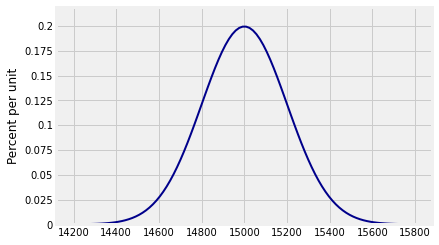

In [72]:
# Approximate distribution of total weight

n = 100
mu = 150
sigma = 20

mean = n*mu
sd = (n**0.5)*sigma

plot_interval = make_array(mean-4*sd, mean+4*sd)

Plot_norm(plot_interval, mean, sd)

The chance that the total weight of the sampled people is less than 15,100 pounds is approximately the gold area below. The CLT allows us to use the normal curve as an approximation to the unknown exact distribution of the total weight.

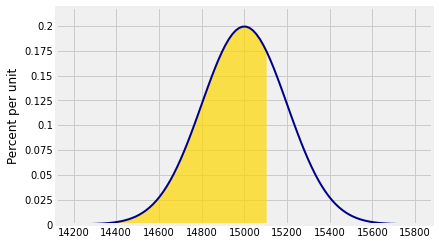

In [73]:
Plot_norm(plot_interval, mean, sd, right_end=15100)

The function `stats.norm.cdf` takes the mean and SD as optional arguments. Remember that the names `mean` and `sd` were assigned in an earlier cell. Also remember that the answer below is not exact but an approximation based on the CLT.

In [74]:
stats.norm.cdf(15100, mean, sd)

0.6914624612740131

To find the approximate 90th percentile of the distribution of weights, you can use `stats.norm.ppf` with the mean and SD as arguments.

In [75]:
stats.norm.ppf(0.9, mean, sd)

15256.31031310892

The conclusion is $P(S \le 15256) \approx 0.9$ where $S$ denotes the total weight.

### Using Standard Units ###

While it convenient to be able to enter the mean and SD as arguments to `stats.norm.cdf` and `stats.norm.ppf`, there is really only one normal curve that matters – the standard normal curve. All the others are obtained by linear transformations of the horizontal axis. 

Therefore all the calculations above can be done in terms of the standard normal cdf by standardizing, and therefore all normal approximations can (and will) be written in terms of the standard normal cdf $\Phi$. We don't need to use a different cdf for each mean and SD.

For example, we can redo the two calculations above as follows.

To find the approximate chance that the total weight is less than 15100 pounds, first standardize 15100 and then use the standard normal cdf:

$$
P(S < 15100) ~ \approx ~ \Phi \big{(} \frac{15100 - 15000}{200} \big{)}
$$

The calculation gives the same answer as before.

In [76]:
z = (15100 - mean)/sd

stats.norm.cdf(z) 

0.6914624612740131

To find 90th percentile of the approximate distribution of the $S$, first find the 90th percentile of the standard normal curve. This value is the 90th percentile of any normal curve, measured in standard units.

In [77]:
z = stats.norm.ppf(0.9)
z

1.2815515655446004

Now convert the standard units back to pounds. The 90th percentile of the distribution of $S$ is approximately $\Phi^{-1}(0.9)\cdot200 + 15000$. The numerical answer is the same as before.

In [78]:
x = z*sd + mean
x

15256.31031310892